In [160]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress

df = pd.read_csv("cleandata/clean_df.csv")
df = df[['Unnamed: 0', 'ID', 'Name', "Team", 'Games', 'Sport', 'Event', 'Medal','region','Population', 'Area (sq km)', 'GDP']]
df["Medal"] = df["Medal"].fillna("no")
df["Medal"].value_counts()

no        179226
Bronze      9665
Gold        9411
Silver      9261
Name: Medal, dtype: int64

In [161]:
medals = pd.DataFrame({
    "Medals" : df["Medal"]
})

medals = pd.get_dummies(medals)
df["Bronze"] = medals["Medals_Bronze"]
df["Silver"] = medals["Medals_Silver"]
df["Gold"] = medals["Medals_Gold"]
df["No Win"] = medals["Medals_no"]
df["Attempts"] = df["Bronze"] + df["Silver"] + df["Gold"] + df["No Win"]
df["Wins"] = df["Bronze"] + df["Silver"] + df["Gold"]
df["GDP"] = df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)
df.head(1)

,Unnamed: 0,ID,Name,Team,Games,Sport,Event,Medal,region,Population,Area (sq km),GDP,Bronze,Silver,Gold,No Win,Attempts,Wins
0,0,1,A Dijiang,China,1992 Summer,Basketball,Basketball Men's Basketball,no,China,1182230625,9326410,4.270000e+11,0,0,0,1,1,0


In [162]:
team_group = df.groupby(by = ["Team", "Games", "Sport", "Event", "region"], as_index= False).agg({
    "Population" : "mean",
    "Attempts" : "max",
    "Wins" : "max",
    "Area (sq km)" : "mean",
    "GDP" : "mean",
    "Bronze" : "max",
    "Silver" : "max",
    "Gold" : "max",
})

country_list = team_group.groupby(["region"], as_index= False).agg({
    "Population" : "mean",
    "Attempts" : "sum",
    "Wins" : "sum",
    "Area (sq km)" : "mean",
    "GDP" : "mean",
    "Bronze" : "sum",
    "Silver" : "sum",
    "Gold" : "sum",
})
country_group = team_group.groupby(["region", "Games"], as_index= False).agg({
    "Population" : "mean",
    "Attempts" : "sum",
    "Wins" : "sum",
    "Area (sq km)" : "mean",
    "GDP" : "mean",
    "Bronze" : "sum",
    "Silver" : "sum",
    "Gold" : "sum",
}).sort_values(by = "Wins")
try:
    country_group["Win Rate"] = country_group["Wins"] / country_group["Attempts"]
except:
    0
country_group["GDP Per Capita"] = country_group["GDP"] / country_group["Population"]
country_list = country_list.loc[country_list["Wins"] >= 20]
country_group = country_group.loc[country_group["Wins"] >= 1]


In [163]:
#looping blank lists
country = country_list["region"].unique()
r2_pop = []
r2_gdp = []
r2_gdp_per_capita = []
r2_pop_MR = []
r2_gdp_MR = []
r2_gdp_per_capita_MR = []
count_r2_gdp_pc_MR = []


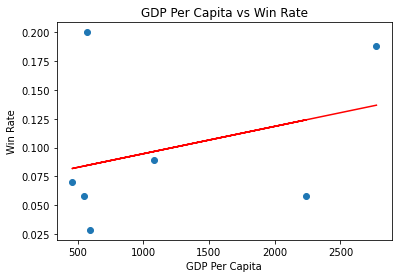

In [164]:
for x in country:
    try:    
        c_loop = country_group
        c_loop = c_loop.loc[c_loop["region"] == f'{x}']    
        # try:
        # pop x medals
        plt.clf()
        x_val = c_loop["Population"].astype(float)
        y_val = c_loop["Wins"]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
        regress_values = x_val * slope + intercept
        plt.scatter(x_val, y_val)
        plt.plot(x_val,regress_values,"r-")
        plt.xlabel('Population')
        plt.ylabel('Medals')
        plt.title("Population vs Medals")
        plt.savefig(f'breakdowns/countryplots/Pop/{x}xPopulation.jpeg')
        r2_pop.append(rvalue**2)
            # GDP x medals
        plt.clf()
        x_val = c_loop["GDP"].astype(float)
        y_val = c_loop["Wins"]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
        regress_values = x_val * slope + intercept
        plt.scatter(x_val, y_val)
        plt.plot(x_val,regress_values,"r-")
        plt.xlabel('GDP')
        plt.ylabel('Medals')
        plt.title("GDP vs Medals")
        plt.savefig(f'breakdowns/countryplots/GDP/{x}xGDP.jpeg')
        r2_gdp.append(rvalue**2)
            # GDP per capita x medals
        plt.clf()
        x_val = c_loop["GDP Per Capita"].astype(float)
        y_val = c_loop["Wins"]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
        regress_values = x_val * slope + intercept
        plt.scatter(x_val, y_val)
        plt.plot(x_val,regress_values,"r-")
        plt.xlabel('GDP Per Capita')
        plt.ylabel('Medals')
        plt.title("GDP Per Capita vs Medals")
        plt.savefig(f'breakdowns/countryplots/GDP_PC/{x}xGDP Per Capita.jpeg')
        r2_gdp_per_capita.append(rvalue**2)
        #switching to the y value being Medal Rate/Win Rate
        # pop x medals
        plt.clf()
        x_val = c_loop["Population"].astype(float)
        y_val = c_loop["Win Rate"]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
        regress_values = x_val * slope + intercept
        plt.scatter(x_val, y_val)
        plt.plot(x_val,regress_values,"r-")
        plt.xlabel('Population')
        plt.ylabel('Win Rate')
        plt.title("Population vs Win Rate")
        plt.savefig(f'breakdowns/countryplots_mr/Pop/{x}xPopulation.jpeg')
        r2_pop_MR.append(rvalue**2)
            # GDP x medals
        plt.clf()
        x_val = c_loop["GDP"].astype(float)
        y_val = c_loop["Win Rate"]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
        regress_values = x_val * slope + intercept
        plt.scatter(x_val, y_val)
        plt.plot(x_val,regress_values,"r-")
        plt.xlabel('GDP')
        plt.ylabel('Win Rate')
        plt.title("GDP vs Win Rate")
        plt.savefig(f'breakdowns/countryplots_mr/GDP/{x}xGDP.jpeg')
        r2_gdp_MR.append(rvalue**2)
            # GDP per capita x medals
        plt.clf()
        x_val = c_loop["GDP Per Capita"].astype(float)
        y_val = c_loop["Win Rate"]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
        regress_values = x_val * slope + intercept
        plt.scatter(x_val, y_val)
        plt.plot(x_val,regress_values,"r-")
        plt.xlabel('GDP Per Capita')
        plt.ylabel('Win Rate')
        plt.title("GDP Per Capita vs Win Rate")
        plt.savefig(f'breakdowns/countryplots_mr/GDP_PC/{x}xGDP Per Capita.jpeg')
        r2_gdp_per_capita_MR.append(rvalue**2)
        count_r2_gdp_pc_MR.append(len(c_loop))
    except:
        r2_pop.append(0)
        r2_gdp.append(0)
        r2_gdp_per_capita.append(0)
        r2_pop_MR.append(0)
        r2_gdp_MR.append(0)
        r2_gdp_per_capita_MR.append(0)
        count_r2_gdp_pc_MR.append(0)

In [165]:
print(len(r2_pop))
print(len(r2_gdp))
print(len(r2_gdp_per_capita))
print(len(r2_pop_MR))
print(len(r2_gdp_MR))
print(len(r2_gdp_per_capita_MR))
print(len(count_r2_gdp_pc_MR))
print(len(country))

57
57
57
57
57
57
57
57


In [166]:
Country_Data = pd.DataFrame({
    "Country": country,
    "R2 Population": r2_pop,
    "R2 GDP": r2_gdp,
    "R2 GDP PC": r2_gdp_per_capita,
    "R2 WR Population": r2_pop_MR,
    "R2 WR GDP": r2_gdp_MR,
    "R2 WR GDP PC": r2_gdp_per_capita_MR,
    "# of Data Points" : count_r2_gdp_pc_MR,
}).sort_values(by = "R2 Population", ascending = False)
Country_Data = Country_Data.loc[Country_Data["# of Data Points"] >= 20]
Country_Data.head(20)

,Country,R2 Population,R2 GDP,R2 GDP PC,R2 WR Population,R2 WR GDP,R2 WR GDP PC,# of Data Points
8,Canada,0.415494,0.364884,0.381561,0.272017,0.230603,0.241690,29
35,Netherlands,0.361185,0.354547,0.350783,0.000558,0.000893,0.001259,29
17,France,0.305657,0.306419,0.302078,0.117909,0.129498,0.119726,30
47,South Korea,0.201236,0.098296,0.107307,0.374350,0.192706,0.208320,20
50,Switzerland,0.195439,NaN,NaN,0.003573,NaN,NaN,29
2,Austria,0.170539,0.180540,0.183152,0.016274,0.021858,0.022509,28
39,Norway,0.154130,0.137646,0.148078,0.000025,0.000387,0.000696,28
53,UK,0.152206,0.120517,0.110536,0.125776,0.112851,0.101586,25
16,Finland,0.103276,0.146123,0.139279,0.109474,0.122445,0.119452,30
54,USA,0.065312,0.068698,0.068440,0.000169,0.003051,0.001470,29


In [167]:
country_group.corr()

,Population,Attempts,Wins,Area (sq km),GDP,Bronze,Silver,Gold,Win Rate,GDP Per Capita
Population,1.000000,0.184930,0.245531,0.401656,0.371238,0.221747,0.236968,0.265810,0.128409,-0.094434
Attempts,0.184930,1.000000,0.787962,0.329980,0.398832,0.786657,0.736134,0.676240,0.189945,0.220239
Wins,0.245531,0.787962,1.000000,0.464474,0.485387,0.958730,0.967006,0.957377,0.579503,0.184902
Area (sq km),0.401656,0.329980,0.464474,1.000000,0.350591,0.437378,0.459175,0.472684,0.325822,-0.019076
GDP,0.371238,0.398832,0.485387,0.350591,1.000000,0.456453,0.474158,0.467896,0.246707,0.349198
Bronze,0.221747,0.786657,0.958730,0.437378,0.456453,1.000000,0.897050,0.874410,0.552763,0.174672
Silver,0.236968,0.736134,0.967006,0.459175,0.474158,0.897050,1.000000,0.918895,0.582203,0.181615
Gold,0.265810,0.676240,0.957377,0.472684,0.467896,0.874410,0.918895,1.000000,0.587114,0.148489
Win Rate,0.128409,0.189945,0.579503,0.325822,0.246707,0.552763,0.582203,0.587114,1.000000,0.120225
GDP Per Capita,-0.094434,0.220239,0.184902,-0.019076,0.349198,0.174672,0.181615,0.148489,0.120225,1.000000
